In [2]:
import numpy as np
import cv2
from random import sample

imgL=cv2.imread('stereo_images/1L_rect.jpg')
imgR=cv2.imread('stereo_images/1R_rect.jpg')
imL=imgL[:,:,0]
imR=imgR[:,:,0]
#k=25
N=imgL.shape[1]
M=imgL.shape[0]
print(imgL[0,0])
print(M,N)
V=np.empty((N,N))
P=np.empty((N,N))
C_occl=0.22
label=np.empty(3)
matches=[]
for k in range(M):
    for i in range(N):
        V[i,0]=i*C_occl
    for j in range(N):
        V[0,j]=j*C_occl
    for i in range(1,N,1):
        for j in range(1,N,1):
            label[0]=(imL[k,i-1]/255-imR[k,j-1]/255)**2 + (imL[k,i]/255-imR[k,j]/255)**2
            #print(label[0])
            label[1]=(imL[k,i-1]/255-imR[k,j]/255)**2   + C_occl
            label[2]=(imL[k,i]/255-imR[k,j-1]/255)**2   + C_occl
            #print(label)
            V[i,j]=np.min(label)
            P[i,j]=np.argmin(label)
    i=0
    j=0
    while(j<N and i<N):
        if P[i,j]==0:
            matches.append((k,i,k,j)) 
            i+=1
            j+=1
        elif P[i,j]==1:
            i+=1
        else:
            j+=1
        
p=len(matches)
print(p)
matches=np.asarray(matches)
matches=np.reshape(matches,(p,4))
print(matches)

[60 60 60]
165 235
33253
[[  0   0   0   2]
 [  0   2   0 185]
 [  0   3   0 186]
 ...
 [164 230 164 232]
 [164 231 164 233]
 [164 232 164 234]]


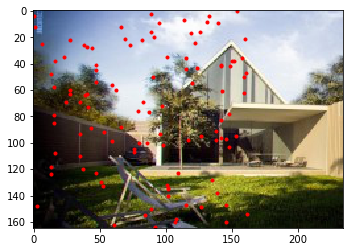

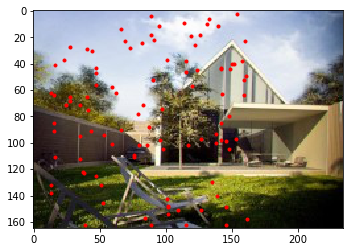

In [7]:
import matplotlib.pyplot as plt
matches2=sample(list(matches[:]),150)
matches2=np.asarray(matches2)
img1 = plt.imread('stereo_images/1L_rect.jpg')
plt.plot(matches2[:,0],matches2[:,1],'r.')  

plt.imshow(img1)
plt.savefig('stereo_dyn1L.jpg')
plt.show()
img2 = plt.imread('stereo_images/1R_rect.jpg')
plt.plot(matches2[:,2],matches2[:,3],'r.')  

plt.imshow(img2)
plt.savefig('stereo_dyn1R.jpg')
plt.show()